# Students Performance Data Set

In [ ]:
%pylab inline
import numpy as np                              # importing all the necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
sp = pd.read_csv('StudentsPerformance.csv')    
#Reading the csv data.
sp                                                

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
sp.head()                 # .head gives us first 5 values from the data set.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
!pip install pandas-profiling --upgrade pip

In [ ]:
import pandas_profiling
profile = sp.profile_report(title = 'sp report')
profile.to_file(output_file = 'sp_report.html')               # Generating output in the html format.

In [9]:
sp['total'] = (sp['math score'] + sp['reading score']+ sp['writing score'])/3           #Calculating average score.
sp['total']                                                                     

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: total, Length: 1000, dtype: float64

In [10]:
sp['total'].round(2)

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: total, Length: 1000, dtype: float64

In [11]:
sp.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score,total
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,67.770667,67.770667
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,14.257326,14.257326
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,9.000000,9.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,58.333333,58.333333
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,68.333333,68.333333
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,77.666667,77.666667


maximum marks in each subject is 100.
there is no outlier in the data.
math score is right skewed
Reading, writing and average score is left skewed.

In [12]:
sp['gender'].value_counts()          

female    518
male      482
Name: gender, dtype: int64

In [13]:
sp['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [29]:
sp['parental level of education'].value_counts()

high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [30]:
sp['parental level of education'].replace(to_replace = 'some high school', value = 'high school',inplace= True)   # replacing some high school to high school. 
sp['parental level of education'].value_counts()

high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [16]:
sp['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [17]:
sp['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

## Gender

Text(0.5, 0, 'Gender')

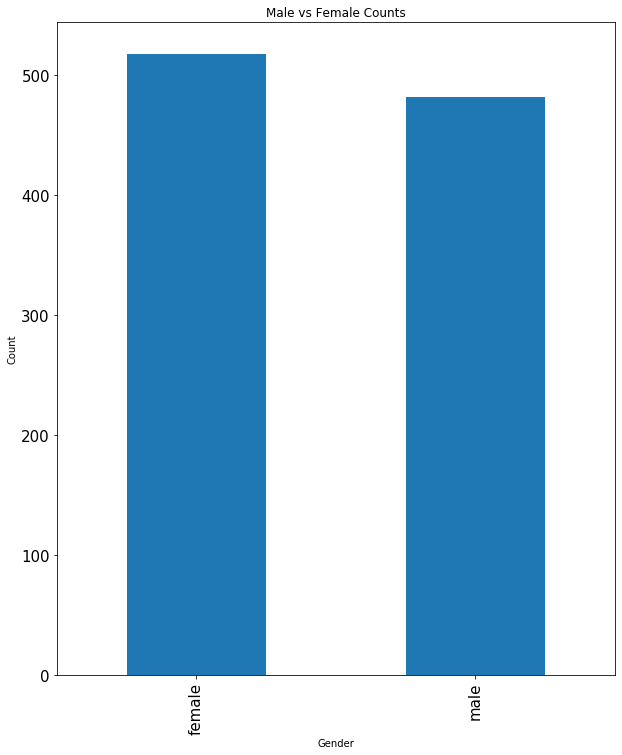

In [19]:
sp['gender'].value_counts().plot(kind = 'bar', figsize=(10,12), fontsize = 15)
plt.title ('Male vs Female Counts')                                         
plt.ylabel('Count')
plt.xlabel('Gender')

Number of female is more than male.

## Race/ethnicity

Text(0.5, 0, 'Race/ethnicity')

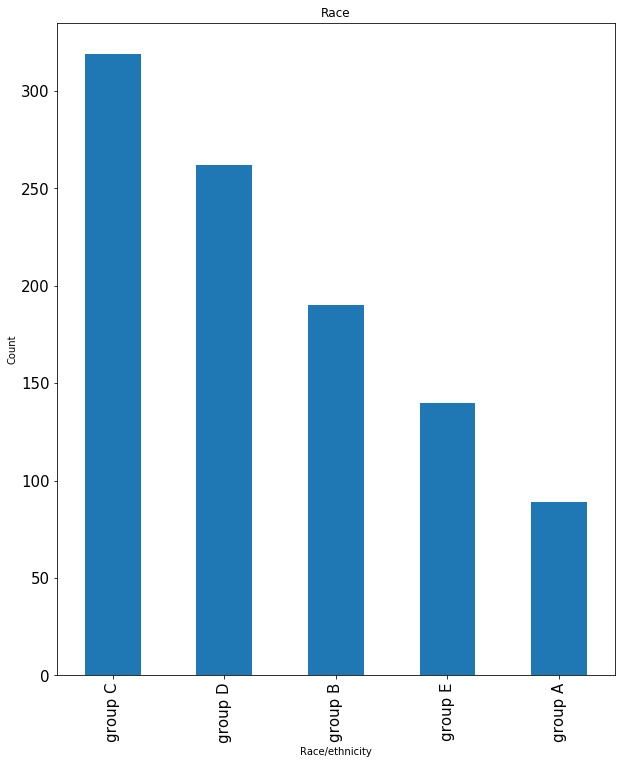

In [20]:
sp['race/ethnicity'].value_counts().plot(kind = 'bar', figsize=(10,12), fontsize = 15)   
plt.title ('Race')
plt.ylabel('Count')
plt.xlabel('Race/ethnicity')

Among 5 Groups, group C has more student and group A has less student.

## Parental level of education

Text(0.5, 1.0, 'parental level of education')

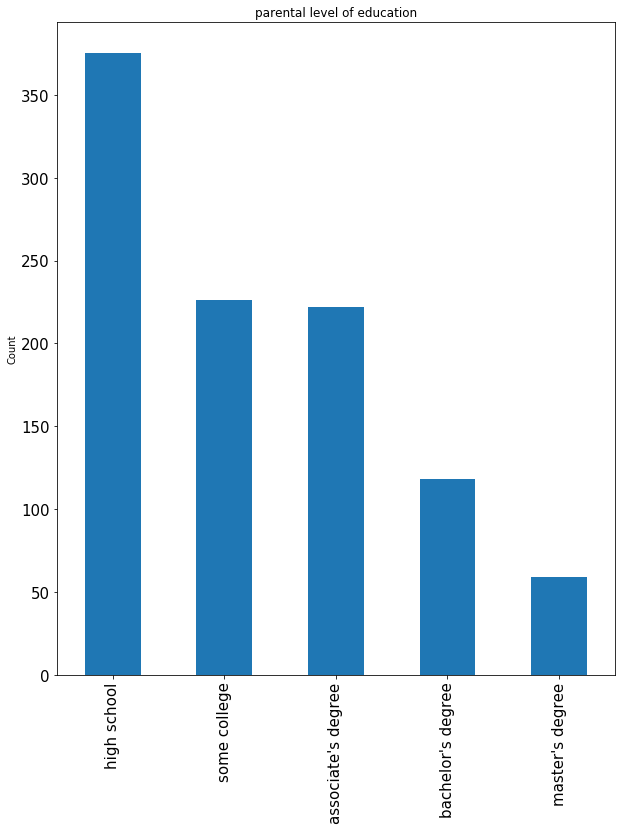

In [21]:
sp['parental level of education'].value_counts().plot(kind = 'bar', figsize=(10,12), fontsize = 15)
plt.ylabel('Count')
plt.title('parental level of education')

The maximum qualification of parents are mostly from high school and very few with masters degree.

## Marks analysis

Text(0.5, 0, 'Gender')

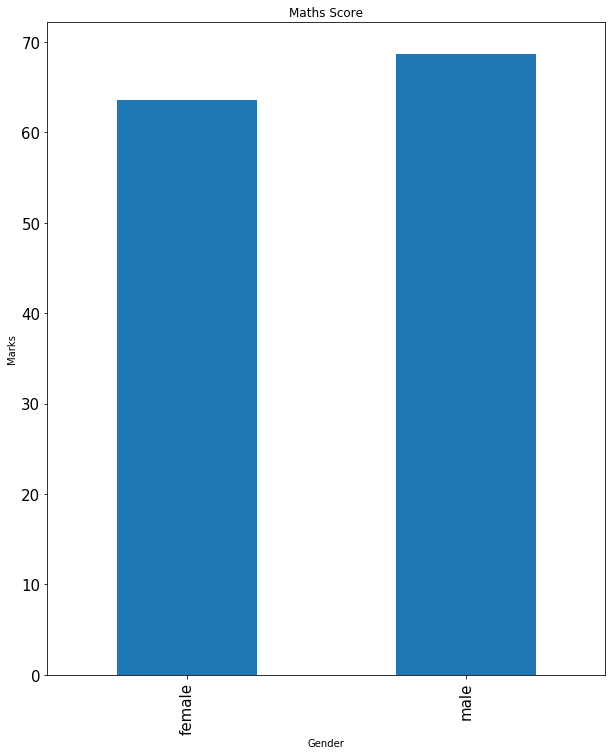

In [22]:
sp.groupby(['gender'])['math score'].mean().plot(kind = 'bar', figsize=(10,12), fontsize = 15)
plt.title ('Maths Score')
plt.ylabel('Marks')
plt.xlabel('Gender')
# Observation Male performed well in maths.

Male scored higher marks in math.

Text(0.5, 0, 'Gender')

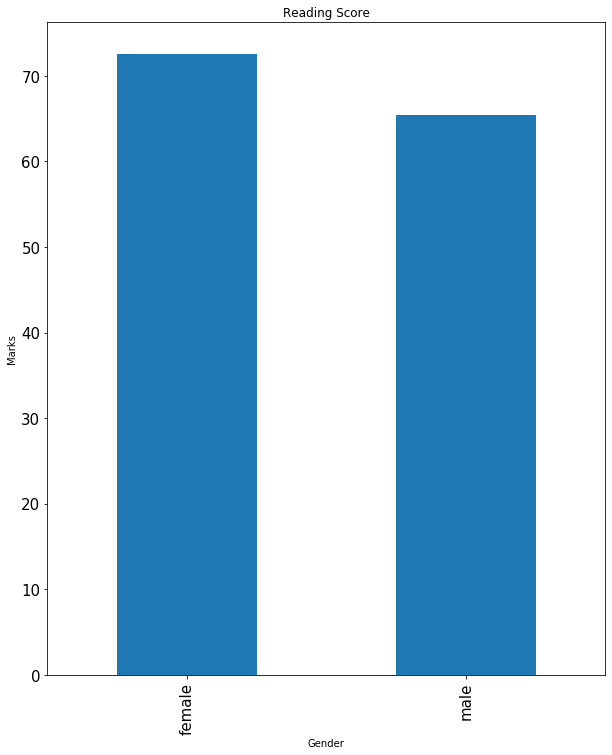

In [23]:
sp.groupby(['gender'])['reading score'].mean().plot(kind = 'bar', figsize=(10,12), fontsize = 15) 
plt.title('Reading Score')
plt.ylabel('Marks')
plt.xlabel('Gender')

In reading females got higher marks.

Text(0.5, 0, 'Gender')

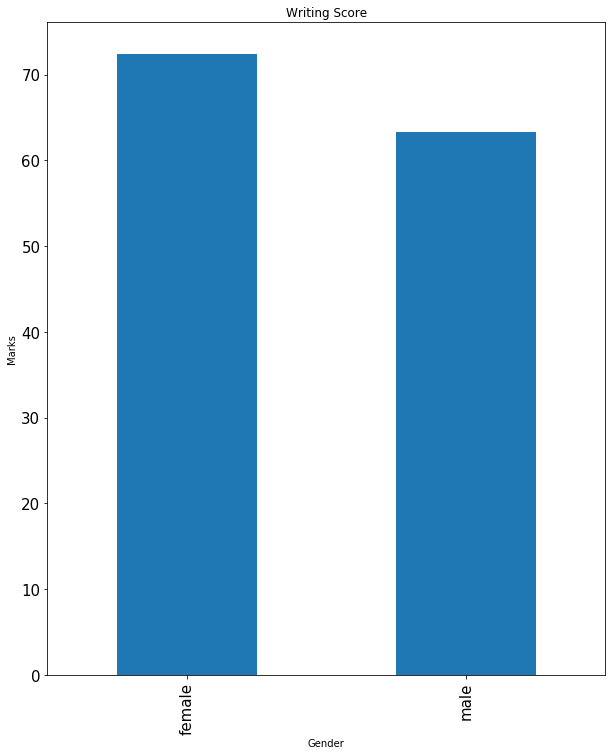

In [24]:
sp.groupby(['gender'])['writing score'].mean().plot(kind = 'bar', figsize=(10,12), fontsize = 15)
plt.title('Writing Score')
plt.ylabel('Marks')
plt.xlabel('Gender')

In writing female achieved higher marks.

Text(0.5, 0, 'Status')

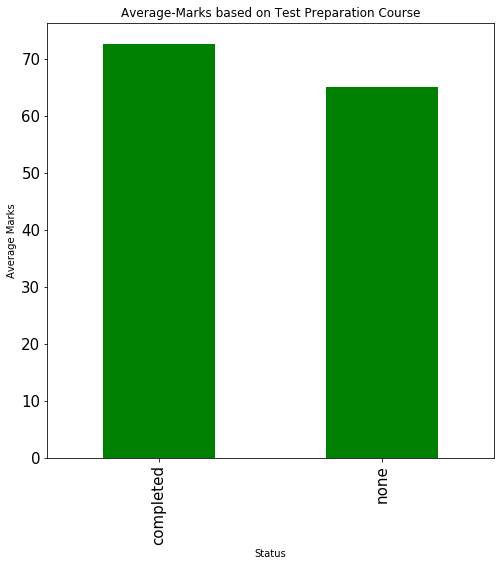

In [31]:
sp.groupby(['test preparation course'])['total'].mean().plot(kind = 'bar', figsize=(8,8), fontsize = 15, cmap='ocean')    # those who completed test preparation course performed well
plt.title('Average-Marks based on Test Preparation Course')
plt.ylabel('Average Marks')
plt.xlabel('Status')

Student completing test preparation course scored higher marks on an average.

Text(0.5, 0, 'Status')

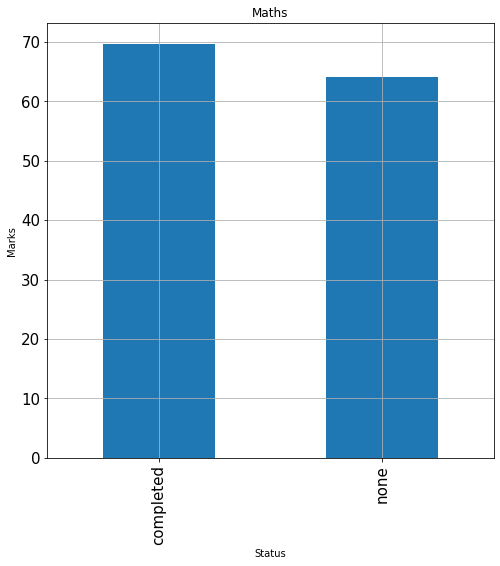

In [32]:
sp.groupby(['test preparation course'])['math score'].mean().plot(kind = 'bar', figsize=(8,8),grid = True, fontsize = 15)    # those who completed test preparation course performed well
plt.title('Maths')
plt.ylabel('Marks')
plt.xlabel('Status')


Text(0.5, 0, 'Status')

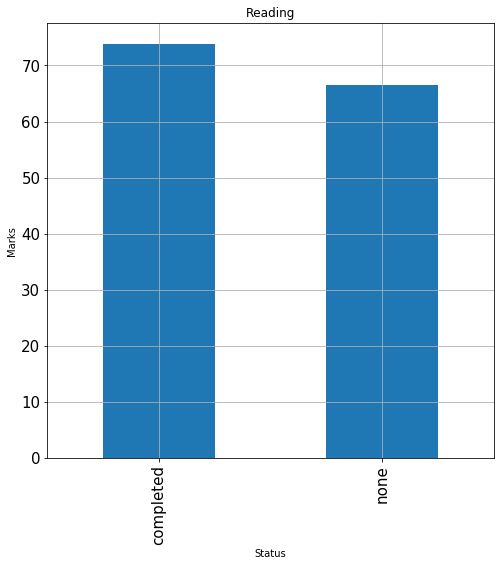

In [33]:
sp.groupby(['test preparation course'])['reading score'].mean().plot(kind = 'bar', figsize=(8,8),grid = True, fontsize = 15)   # those who completed the test prepartion scored well.
plt.title('Reading')
plt.ylabel('Marks')
plt.xlabel('Status')

Text(0.5, 0, 'Status')

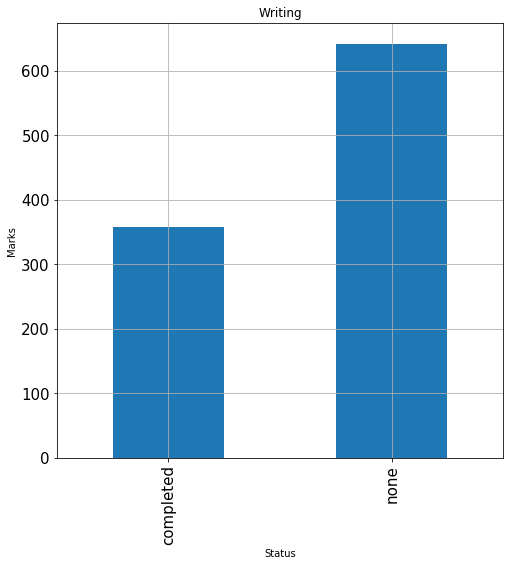

In [34]:
sp.groupby(['test preparation course'])['writing score'].count().plot(kind = 'bar', figsize=(8,8),grid = True, fontsize = 15)   # but in writing those who didnt completed test prepsrstion course has performed well
plt.title('Writing')
plt.ylabel('Marks')
plt.xlabel('Status')

Except for writing, students who completed test preparation course scored highest in math and reading.

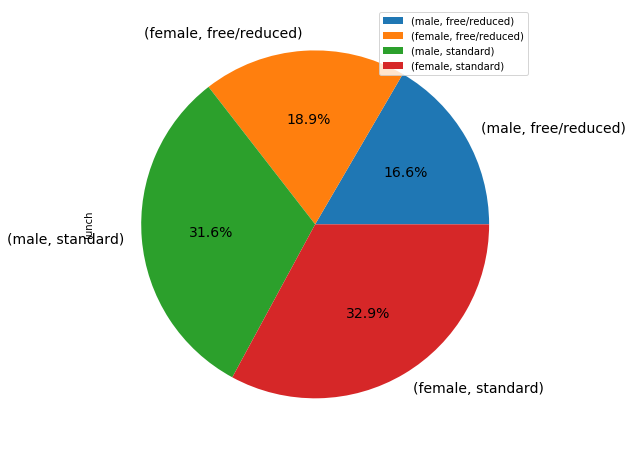

In [36]:
pi = sp.groupby(['gender'])['lunch'].value_counts().sort_values().plot(kind= 'pie', figsize = (10,8),fontsize = 14, autopct= '%.1f%%', legend = True )
pi.legend(loc='upper right')

Pie chart illustrates the lunch consumed by the students. In that standard food is consumed more by females which is 32.9%.

In [37]:
sp.groupby(['gender'])['test preparation course'].value_counts().to_frame()

test preparation course
gender test preparation course                         
female none                                         334
       completed                                    184
male   none                                         308
       completed                                    174

Text(0.5, 0, 'counts')

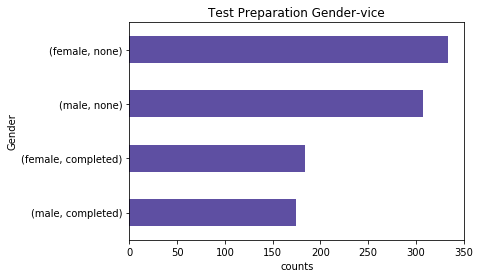

In [38]:
sp.groupby(['gender'])['test preparation course'].value_counts().sort_values().plot(kind= "barh", cmap = 'Spectral_r')      #female are more who didnt completed test completion course

plt.title('Test Preparation Gender-vice')
plt.ylabel('Gender')
plt.xlabel('counts')


Text(0, 0.5, 'Level of Education')

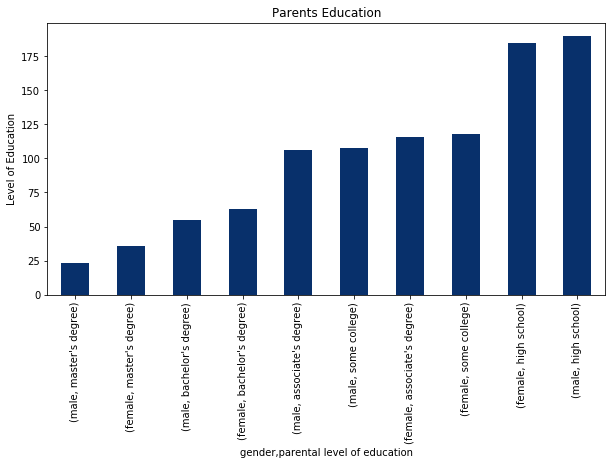

In [39]:
sp.groupby(['gender'])['parental level of education'].value_counts().sort_values().plot(kind = 'bar', cmap='Blues_r',figsize=(10,5))
plt.title('Parents Education')
plt.ylabel('Count')
plt.ylabel("Level of Education")


On an average parents qualification is associate and college degree

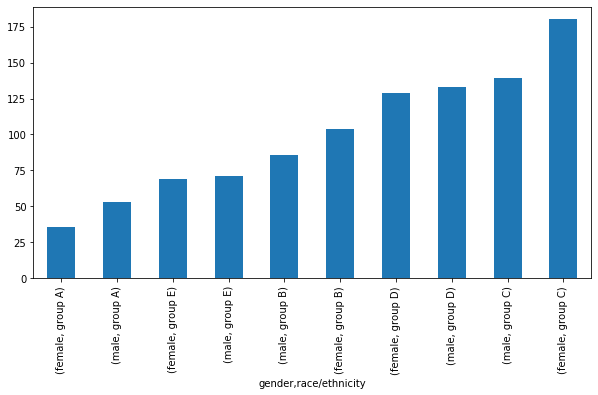

In [40]:
sp.groupby(['gender'])['race/ethnicity'].value_counts().sort_values().plot(kind = 'bar',figsize=(10,5))        #group c is more and group a is less

Text(0, 0.5, 'race/ethnicity')

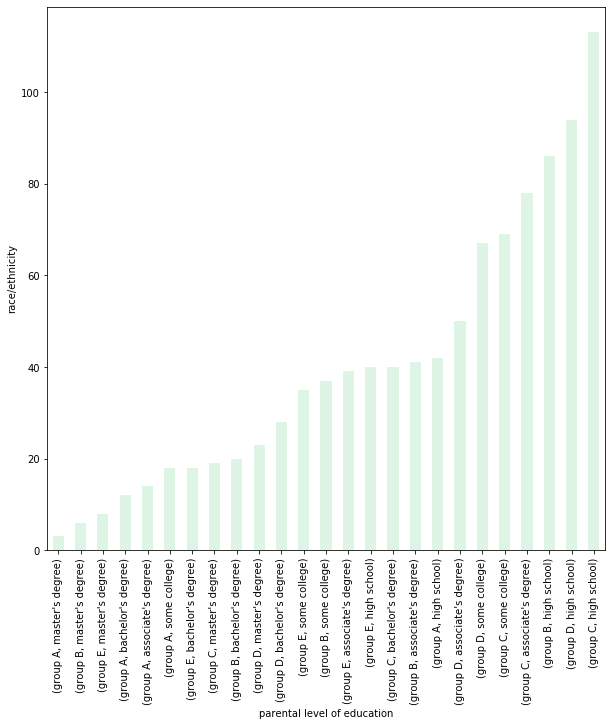

In [41]:
sp.groupby(['race/ethnicity'])['parental level of education'].value_counts().sort_values().plot(kind = 'bar', figsize=(10,10), cmap='mako_r')

plt.xlabel('parental level of education')
plt.ylabel('race/ethnicity')                    #groupc high school level education for parenta are more and group a  masters are less


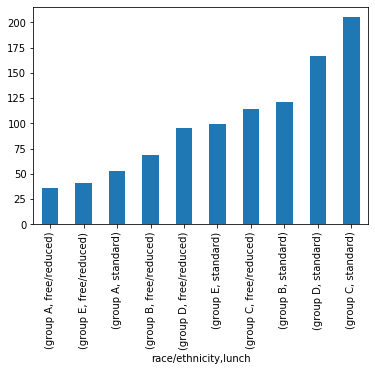

In [42]:
sp.groupby(["race/ethnicity"])['lunch'].value_counts().sort_values().plot(kind= 'bar')

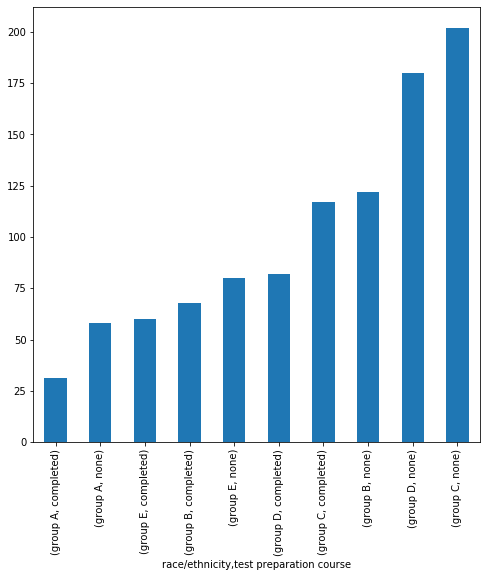

In [43]:
sp.groupby(['race/ethnicity'])['test preparation course'].value_counts().sort_values().plot(kind ='bar', figsize = (8,8))

Text(0.5, 0, 'Race')

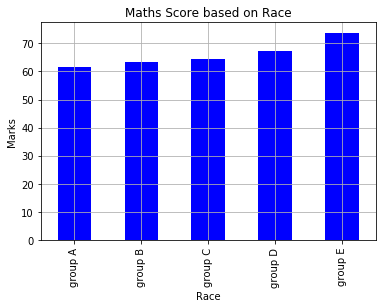

In [44]:
sp.groupby(['race/ethnicity'])['math score'].mean().plot(kind = 'bar',grid = True ,color=  'blue' )

plt.title('Maths Score based on Race')
plt.ylabel('Marks')
plt.xlabel('Race')


Text(0.5, 0, 'Race')

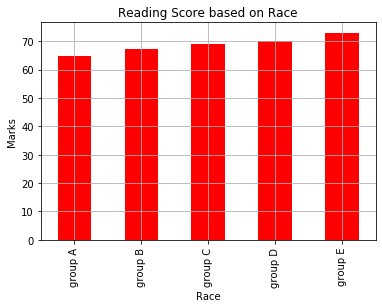

In [45]:
sp.groupby(['race/ethnicity'])['reading score'].mean().plot(kind='bar',grid= True, color = 'red' )
plt.title('Reading Score based on Race')
plt.ylabel('Marks')
plt.xlabel('Race')


Text(0.5, 0, 'Race')

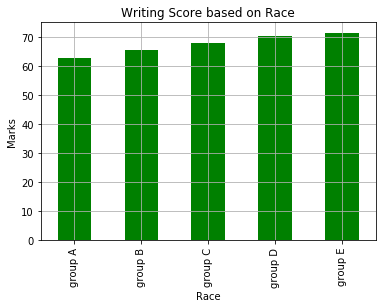

In [46]:
sp.groupby(['race/ethnicity'])['writing score'].mean().plot(kind='bar',grid = True,color= 'green' )
plt.title('Writing Score based on Race')
plt.ylabel('Marks')
plt.xlabel('Race')


Text(0.5, 0, 'Race')

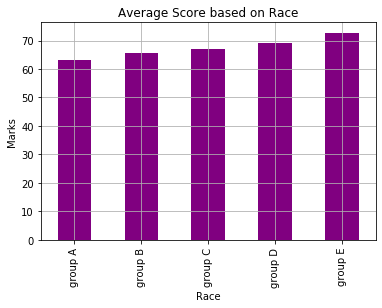

In [47]:
sp.groupby(['race/ethnicity'])['total'].mean().plot(kind='bar',grid = True,color= 'purple' )
plt.title('Average Score based on Race')
plt.ylabel('Marks')
plt.xlabel('Race')

The highest marks obtained in each subject is from group E and lowest is from group A.

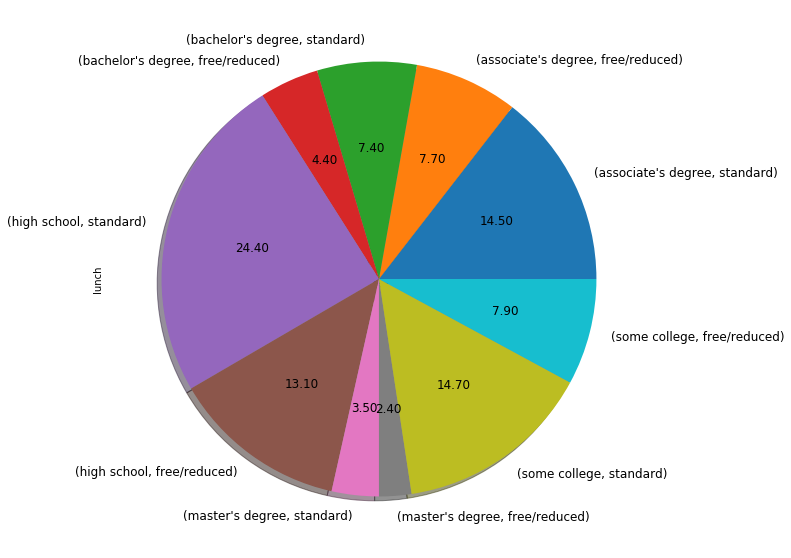

In [48]:
sp.groupby(['parental level of education'])['lunch'].value_counts().plot(kind= 'pie', autopct= '%.2f', figsize= (10,10), fontsize=12, shadow = True)

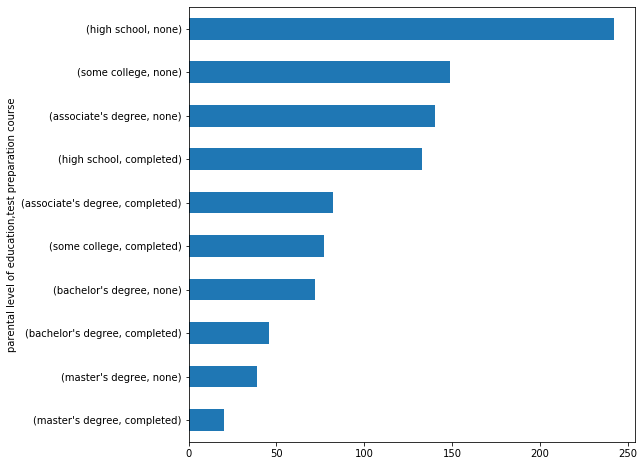

In [49]:
sp.groupby(['parental level of education'])['test preparation course'].value_counts().sort_values().plot(kind = 'barh', figsize = (8,8))

Text(0.5, 0, 'Parents Education')

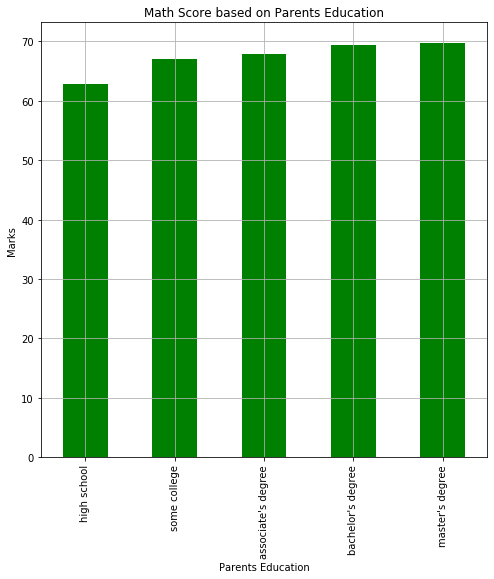

In [50]:
sp.groupby(['parental level of education'])['math score'].mean().sort_values().plot(kind = 'bar',grid =True, color= 'green', figsize = (8,8))
plt.title('Math Score based on Parents Education')
plt.ylabel('Marks')
plt.xlabel('Parents Education')

Text(0.5, 0, 'Parents Education')

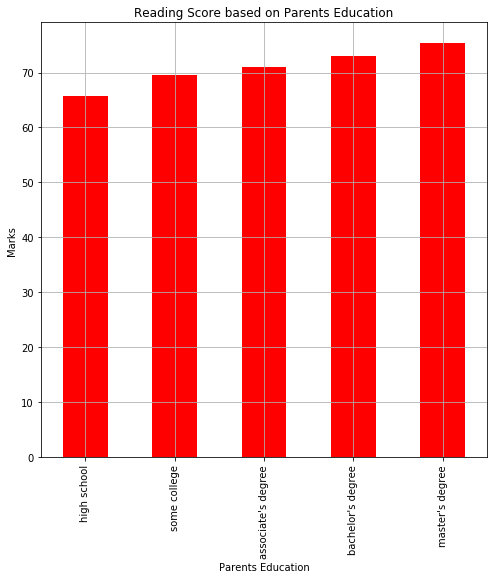

In [51]:
sp.groupby(['parental level of education'])['reading score'].mean().sort_values().plot(kind = 'bar',grid = True, color = 'Red', figsize = (8,8))
plt.title('Reading Score based on Parents Education')
plt.ylabel('Marks')
plt.xlabel('Parents Education')

Text(0.5, 0, 'Parents Education')

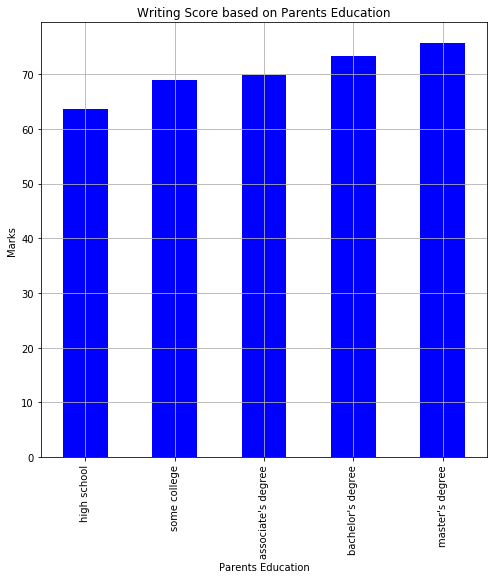

In [52]:
sp.groupby(['parental level of education'])['writing score'].mean().sort_values().plot(kind = 'bar',grid= True, color ='blue', figsize = (8,8))
plt.title('Writing Score based on Parents Education')
plt.ylabel('Marks')
plt.xlabel('Parents Education')

Text(0.5, 0, 'Parents Education')

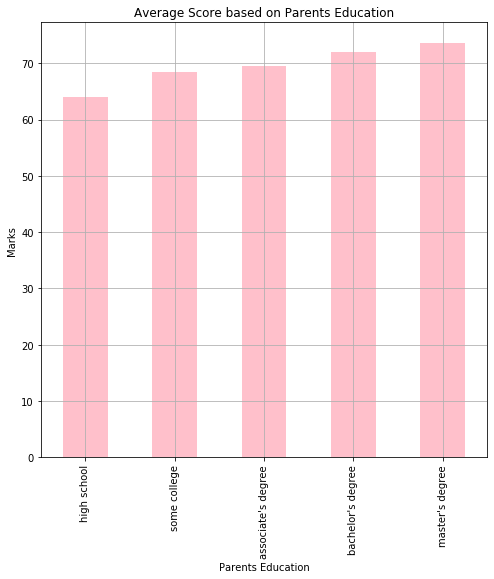

In [53]:
sp.groupby(['parental level of education'])['total'].mean().sort_values().plot(kind = 'bar',grid= True, color ='pink', figsize = (8,8))
plt.title('Average Score based on Parents Education')
plt.ylabel('Marks')
plt.xlabel('Parents Education')

Students got high marks whose parents qualification is master degree and got least marks where parents qulification is high school.

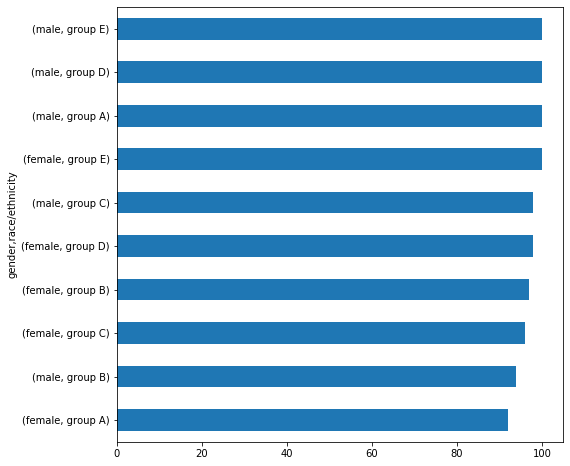

In [56]:
sp.groupby(['gender' , 'race/ethnicity'])['math score'].max().sort_values().plot(kind = 'barh' , figsize = (8,8))

male from group E scored highest, female group A scored least

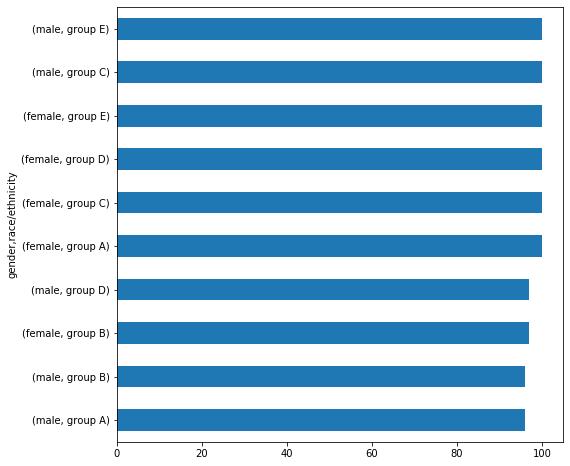

In [57]:
sp.groupby(['gender' , 'race/ethnicity'])['reading score'].max().sort_values().plot(kind = 'barh' , figsize = (8,8))

male group E scored highest in reading and male group A scored least

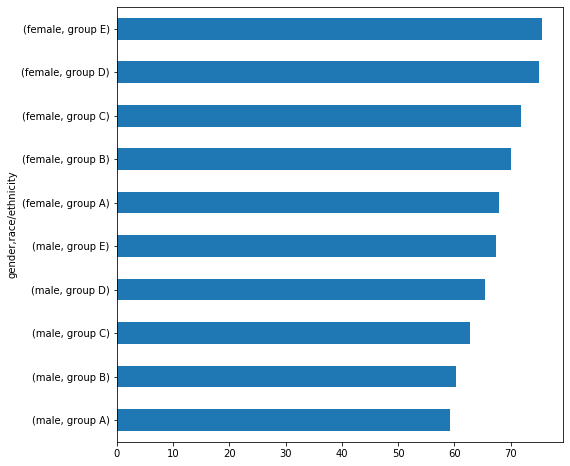

In [58]:
sp.groupby(['gender' , 'race/ethnicity'])['writing score'].mean().sort_values().plot(kind = 'barh' , figsize = (8,8))

female from group E scored highest in writing.
male from group A scored least.

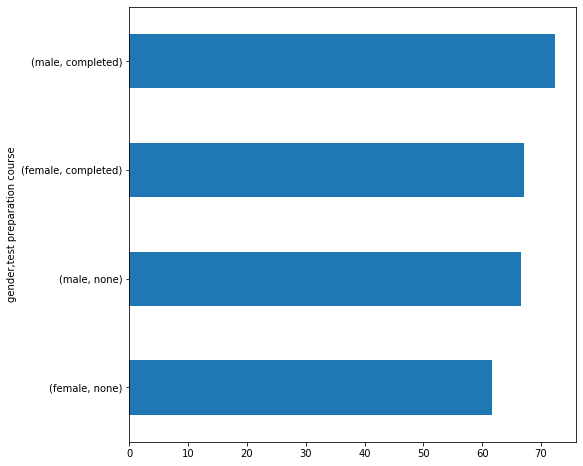

In [59]:
sp.groupby(['gender' , 'test preparation course'])['math score'].mean().sort_values().plot(kind = 'barh' , figsize = (8,8))

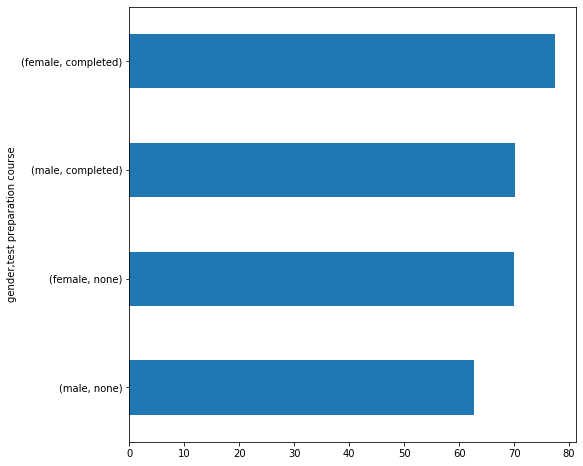

In [60]:
sp.groupby(['gender' , 'test preparation course'])['reading score'].mean().sort_values().plot(kind = 'barh' , figsize = (8,8))

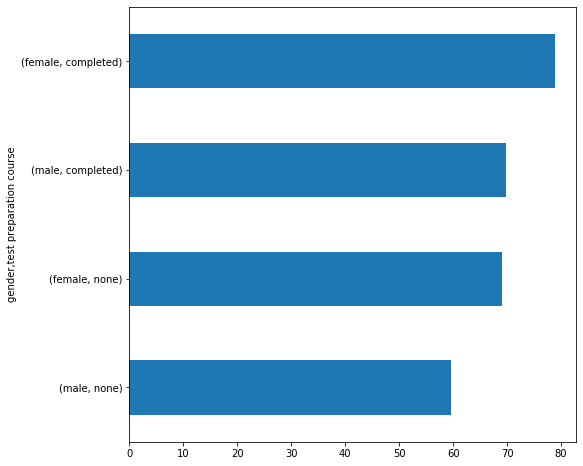

In [61]:
sp.groupby(['gender' , 'test preparation course'])['writing score'].mean().sort_values().plot(kind = 'barh' , figsize = (8,8))

Text(0.5, 0, 'Gender & Test Preparation')

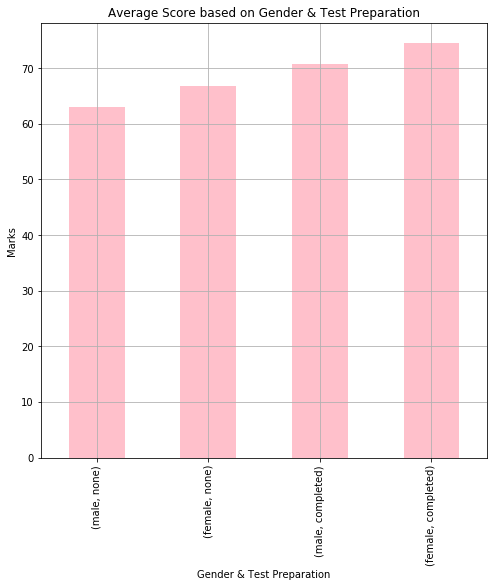

In [62]:
sp.groupby(['gender' , 'test preparation course'])['total'].mean().sort_values().plot(kind = 'bar' , grid = True, color= 'pink',figsize = (8,8))
plt.title('Average Score based on Gender & Test Preparation')
plt.ylabel('Marks')
plt.xlabel('Gender & Test Preparation')

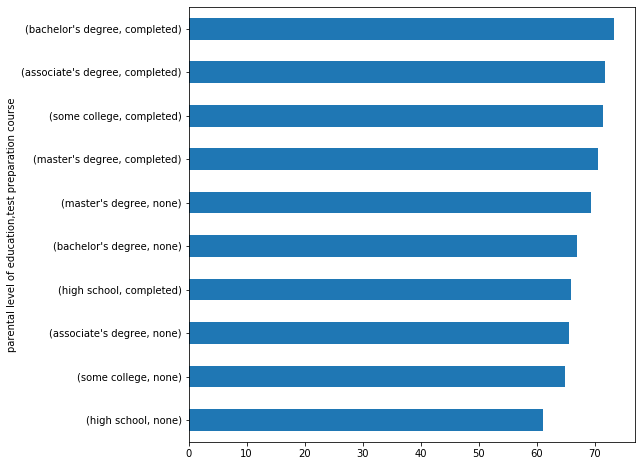

In [63]:
sp.groupby(['parental level of education' , 'test preparation course'])['math score'].mean().sort_values().plot(kind = 'barh' , figsize = (8,8))

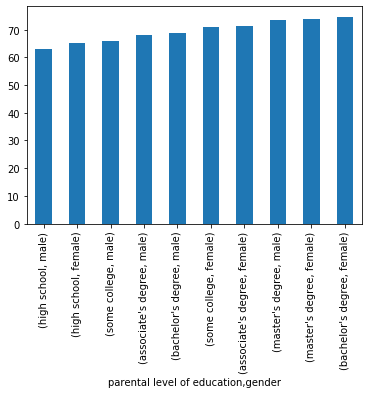

In [64]:
sp.groupby(['parental level of education','gender'])['total'].mean().sort_values(ascending= True).plot(kind = 'bar',)

Text(0.5, 0, 'Parents Education & Test Preparation')

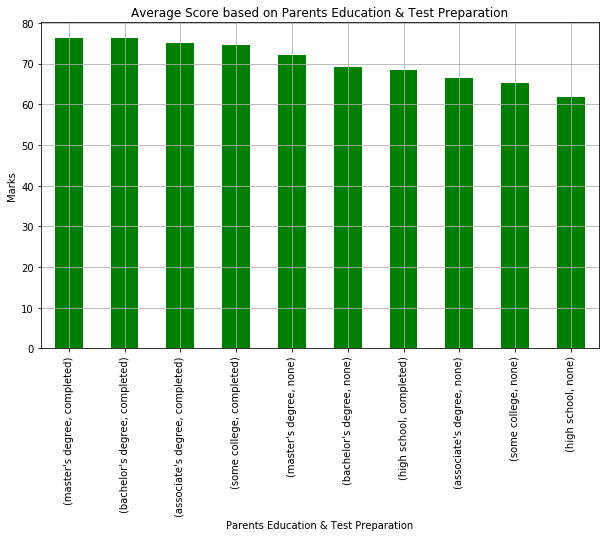

In [66]:
plt.figure(figsize = (10, 6))
sp.groupby(['parental level of education', 'test preparation course'])['total'].mean().sort_values(ascending=False).plot(kind = 'bar',grid= True, color='green')
plt.title('Average Score based on Parents Education & Test Preparation')
plt.ylabel('Marks')
plt.xlabel('Parents Education & Test Preparation')

Text(0.5, 0, 'Gender & Group')

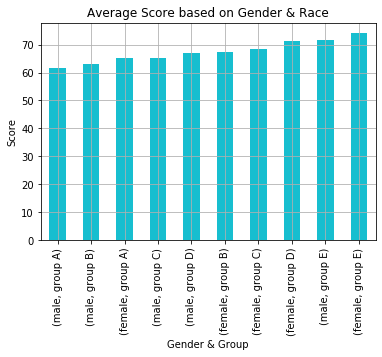

In [67]:
sp.groupby(['gender', 'race/ethnicity'])['total'].mean().sort_values().plot(kind= 'bar', grid = True, cmap= 'tab10_r')
plt.title('Average Score based on Gender & Race')
plt.ylabel('Score')
plt.xlabel('Gender & Group')

Text(0.5, 1.0, 'Performance of Male & Female')

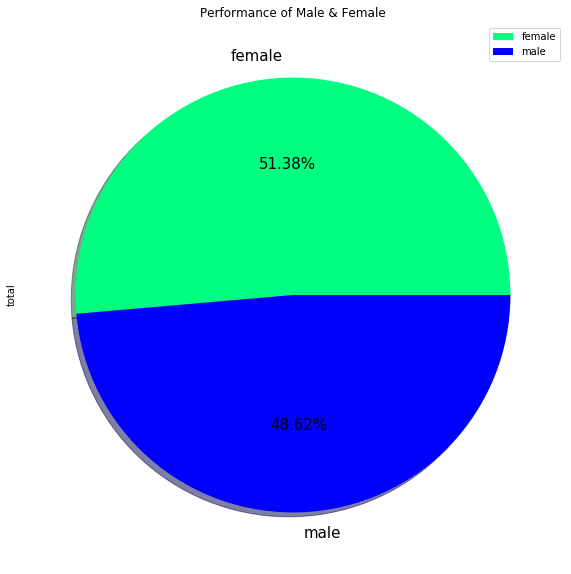

In [28]:
sp.groupby(['gender'])['total'].mean().plot(kind = 'pie', figsize=(10,10), fontsize = 15, shadow = True, autopct = '%.2f%%', legend = True, cmap = 'winter_r')
plt.title('Performance of Male & Female')

Final chart showing the overall performance of female and male, where female achieved 51.38% and male got 48.62%.

Conclusion:
    Parents qualification affecting the students performance.
    Focus should be more on the students whose parents qualification is high school.
    Male should improve in reading and writing.